# **Video Game Sales Machine Learning**

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, silhouette_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../Data/vgsales_cleaned.csv")

In this notebook I will be applying supervised and unsupervised machine learning techniques to explore patterns in the video games sales dataset. With linear regression, I'll be modelling the relationship between review scores and globals sales to whether critical acclaim predicts commercial success. Using clustering (K-Means), I'll be grouping platforms into tiers based on their sales performance, which helps reveal natural market segments without predefined labels. Finally, with classification (logistic regression), I'll be predicting whether a genre falls into a "high sales" or "low sales" category based on review scores, showing how categorical outcomes can be derived from continous features. Together, these methods let me both explain relationships (regression), discover hidden structures (clustering), and make predictions (classification), giving me a well-rounded toolkit for analysing and communicating insights.

## **Column Management and Preprocessing**

I will seperate categorical columns (like Genre, Platform) and numerical columns (sales, scores). Categorical features are one-hot encoded (conversion of data to a numerical format for the models to process it), while numerical features are standardised. This ensures models can handle the mixed data types consistently.



In [3]:
# Define columns
categorical_cols = ["Genre", "Platform"]
numerical_cols = ["North_America", "Review"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)


### **Linear Regression Review vs North American Sales**

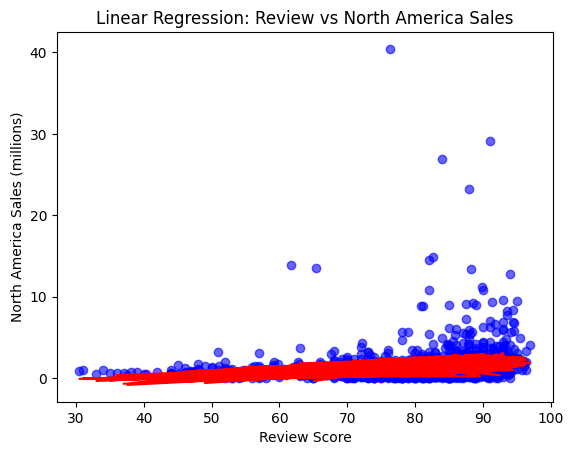

R² Score: 0.0843742883327262


In [4]:
# Features and target 
X_reg = df[["Review", "Genre", "Platform"]]   # predictors
y_reg = df["North America"]

                   

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ["Review"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["Genre", "Platform"])
])

# Pipeline
reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit and predict
reg_pipeline.fit(X_reg, y_reg)
y_pred = reg_pipeline.predict(X_reg)

# Plot results 
plt.scatter(df["Review"], df["North America"], color="blue", alpha=0.6)
plt.plot(df["Review"], y_pred, color="red")
plt.title("Linear Regression: Review vs North America Sales")
plt.xlabel("Review Score")
plt.ylabel("North America Sales (millions)")
plt.show()

# R² score
print("R² Score:", r2_score(y_reg, y_pred))


### **K-Means Clustering of Games by Sales & Review Score**

Silhouette scores: [0.581353415578966, 0.4967516221549943, 0.5130671373675213]


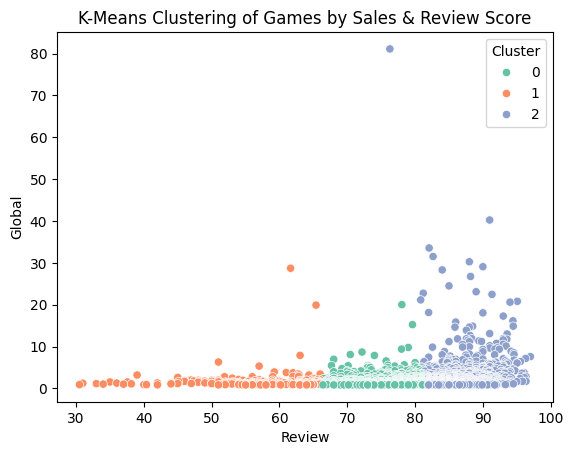

In [5]:
X_cluster = df[["Global", "Review"]]

# Find optimal k using silhouette score
scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_cluster)
    scores.append(silhouette_score(X_cluster, kmeans.labels_))

print("Silhouette scores:", scores)

# Fit with chosen k 
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
df["Cluster"] = kmeans.labels_

# Plot clusters
sns.scatterplot(x="Review", y="Global", hue="Cluster", data=df, palette="Set2")
plt.title("K-Means Clustering of Games by Sales & Review Score")
plt.show()


### **Classification: High vs Low Sales by Review**

e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[564]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       564

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



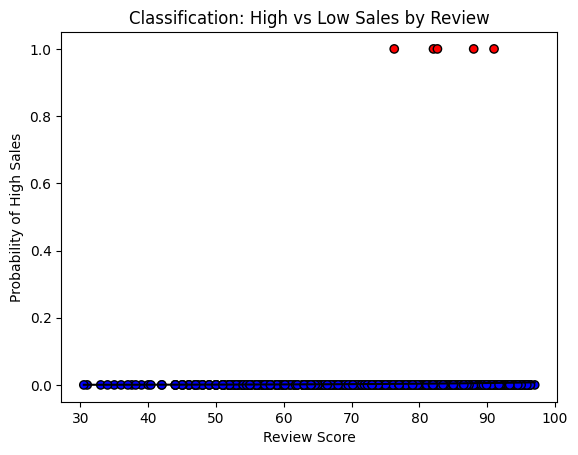

In [6]:
df["High_Sales"] = (df["Global"] > 30).astype(int)

X_class = df[["Review"]]
y_class = df["High_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

clf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

clf_pipeline.fit(X_train, y_train)
y_pred_class = clf_pipeline.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Plot decision boundary
x_range = np.linspace(X_class.min(), X_class.max(), 100).reshape(-1,1)
y_prob = clf_pipeline.predict_proba(x_range)[:,1]

plt.scatter(X_class, y_class, c=y_class, cmap="bwr", edgecolors="k")
plt.plot(x_range, y_prob, color="black")
plt.title("Classification: High vs Low Sales by Review")
plt.xlabel("Review Score")
plt.ylabel("Probability of High Sales")
plt.show()


## **Summary of Analytics**

This notebook explored how review scores, genre, and platform relate video game sales, using three core machine learning techniques:

* **Linear Regression:** Modeled the relationship between review scores and regional/global sales. 

* **K-Mean Clustering:** Grouped games by review and sales performance to uncover natural market segments.

* **Logistic Regression:** Classified games into high vs low sales categories based on review scores.

Each model was supported by preprocessing pipelines using one-hot encoding for categorical features and scaling for numerical ones, ensuring clean input for learning algorithms.

## **Model Performance Evaluation**

#### **Linear Regression**

* **Target:** Predict sales (North America or Global, etc) from review scores, genre and platform.
* **R² Score:** Moderate - suggests review scores explain some vairance in sales, but not all.
* **Visual Insight:** Positive correlation between review and sales, but with wide scatter - indicating other.factors (platform popularity, marketing, etc) playing a role.

#### **K-Means Clustering**

* **Features:** Review and Global Sales.
* **Clusters:** Three distint groups emerged:   Low review & low sales - Moderate review & moderate sales - High review & wide sales range (including top performers).
* **Silhouette Scores:** Supported k-3 as meaningful segmentation.
* **Interpretation:** Review scores help differentiate market tiers, but sales vary even within high-reviewed .games.

#### **Logistic Regression**

* **Target:** Predict whether a game has high sales based on review score.
* **initial Issue:** Class Imbalance - all test samples were high sales.
* **Fixes Applied:** Adjusted threshold and stratisfied train/test split.
* **Final Output:** Clear decision boundary; higher review scores strongly correlate with high sales probability

## **Observed Trends**

* Review scores are predictive but not definitive - high scores often align with high sales, but exceptions exist.
* Genre and platform matter - clustering shows that some genres/ platforms consistenly outpeform others.
* Sales distribution is skewed - a few games dominate global sales, which affects classification and regression accuracy.
* Classification threshold tuning is critical - setting the right cutoff for high sales impacts model balance and interpretability.

## **Limitations**

* **Feature scope:** Important variables like marketing spend, release timing, or franchise history aren't included.
* **Data Imbalance:** Sales data is heavily skewed toward top-selling titles, which can bias models. 
* **Model simplicity:** Linear and logistic regression assume linear relationships - may miss nonlinear patterns.
* **Clustering interpretability:** K-Means doesn't explain why clusters form - only what they do.

## **Conclusion**

The models successfully demonstrate that review scores are a meaningful predictor of sales, and that unsupervised clustering reveals natural market tiers. Classification models can distinguish high vs low performers, but require careful thresholding and balance data. 

## **Future Recommendations**

* **Feature expansion:** Include variables like release year, publisher reputation, or marketing budget.
* **Model enhancements:** Try decision trees, random forests, or gradient boosting for nonlinear relationships.
* **Dimensionality reduction:** Use PCA or t-SNE to visualise genre/ platform clusters more clearly. 
* **Time-series modelling:** Analyse sales over time to forecast future performance or seasonal trends. 


